#### Exchange Rate Data using API

In [56]:
import requests

from datetime import datetime

today= datetime.today().strftime('%Y-%m-%d')
# Set API endpoint and parameters
url = "https://api.apilayer.com/exchangerates_data/timeseries?start_date=2023-04-01&end_date={}".format(today)
params = {"symbols":["AUD,CAD,CHF,CNH,EUR,GBP,HKD,JPY,NZD,USD"], "base": "USD"}

# Set payload and headers
payload = {}
headers= {
  "apikey": "IUf5PDU7VWUEUPeYjxP2rUV9F8MCKGSo"
}

# Send HTTP GET request to API endpoint
response = requests.request("GET", url, headers=headers,params=params, data = payload)

try:
    response.raise_for_status() # Raise an exception if the response status code is not 200
    data = response.json()
    print(data)
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except ValueError:
    print("Error: Response is not in JSON format.")
except Exception as err:
    print(f"Error occurred: {err}")

2023-04-20
https://api.apilayer.com/exchangerates_data/timeseries?start_date=2023-04-01&end_date=2023-04-20
{'success': True, 'timeseries': True, 'start_date': '2023-04-01', 'end_date': '2023-04-20', 'base': 'USD', 'rates': {'2023-04-01': {'AUD': 1.49525, 'CAD': 1.35265, 'CHF': 0.914864, 'EUR': 0.919904, 'GBP': 0.810045, 'HKD': 7.84995, 'JPY': 132.77504, 'NZD': 1.5977, 'USD': 1}, '2023-04-02': {'AUD': 1.500826, 'CAD': 1.34985, 'CHF': 0.91751, 'EUR': 0.92544, 'GBP': 0.813715, 'HKD': 7.84975, 'JPY': 133.296012, 'NZD': 1.605385, 'USD': 1}, '2023-04-03': {'AUD': 1.473101, 'CAD': 1.343435, 'CHF': 0.912775, 'EUR': 0.91655, 'GBP': 0.80499, 'HKD': 7.846935, 'JPY': 132.304501, 'NZD': 1.58681, 'USD': 1}, '2023-04-04': {'AUD': 1.479785, 'CAD': 1.343945, 'CHF': 0.905601, 'EUR': 0.91255, 'GBP': 0.80015, 'HKD': 7.84935, 'JPY': 131.488023, 'NZD': 1.58365, 'USD': 1}, '2023-04-05': {'AUD': 1.488798, 'CAD': 1.345465, 'CHF': 0.90637, 'EUR': 0.91709, 'GBP': 0.8024, 'HKD': 7.849815, 'JPY': 130.931995, 'NZD

In [96]:
import pandas as pd

def json_to_dataframe(json_data):
    try:
        # Flatten JSON data into a DataFrame
        df = pd.json_normalize(json_data).T.iloc[4:].reset_index()
        # Split index column into separate columns
        df= df['index'].str.rsplit('.', 2, expand=True).add_prefix('Col_').join(df)
        df2=df[["Col_1","Col_2",0]]
        # Rename columns
        df2=df2.set_axis(['Date', 'Currency_From',"Currency_To_Value"], axis='columns', inplace=False)
        df2=df2[1:]
        
        df2["Rate type"]= "Spot rate"
        df2["Curency_From_Value"]= 1
        df2["Curency_To"]= "USD"
        # Reorder columns
        df2 = df2[["Rate type", "Date", "Currency_From","Curency_From_Value","Curency_To","Currency_To_Value"]]

        return df2
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

In [97]:
output= json_to_dataframe(data)
print(output)

In [98]:
# Writing the output to an excel file
with pd.ExcelWriter("Exchange_Rates.xlsx") as writer:
    output.to_excel(writer,sheet_name="Exchange_Rate",index=False)

### Problem 1

In [184]:
import pandas as pd
import requests
from datetime import datetime

# Read the files fromt the path
# Change the path of the file accordingly
gl_np=pd.read_excel("/Users/shruthiravishankar/Downloads/Howden_CompanyXYZ_2021_Data.xlsx",sheet_name="GL-np")
ma_np=pd.read_excel("/Users/shruthiravishankar/Downloads/Howden_CompanyXYZ_2021_Data.xlsx",sheet_name="MA-np")


In [187]:
# Create function to process data
def process_data(data_set):
    try:
        today= datetime.today().strftime('%Y-%m-%d')
        
        LOB= data_set['Reported Claims Triangle1'].iloc[0]
        LOB=LOB[2:]
        # Select and rename columns
        data_set_stat = data_set.iloc[3:16,:14]
        data_set_stat.columns = data_set_stat.iloc[0]
        data_set_stat = data_set_stat[1:]
        # Melt the DataFrame
        data_set_stat = data_set_stat.melt(
            id_vars=['U/W year', 'Gross written premium'],
            var_name='DevelopmentMonth',
            value_name='LossIncurredRatio'
        )
        # Add line of business and other columns
        data_set_stat['LineOfBusiness'] = LOB
        data_set_stat['DWCreatedDate'] = today
        data_set_stat['DWCreatedBy'] = "Shruthi"
        data_set_stat['Currency'] = "EUR"
        data_set_stat['CompanyName'] = "CompanyXYZ"
        data_set_stat=data_set_stat.drop('Gross written premium', axis=1)
        data_set_stat = data_set_stat.rename(columns={data_set_stat.columns[0]: 'Year'})
        data_set_stat = data_set_stat.dropna(subset=['LossIncurredRatio'])


        
        return data_set_stat
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

In [188]:
gl_np_stat=process_data(gl_np)
gl_np_stat

,Year,DevelopmentMonth,LossIncurredRatio,LineOfBusiness,DWCreatedDate,DWCreatedBy,Currency,CompanyName
0,2010,12,0.064168,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
1,2011,12,0.043751,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
2,2012,12,0.01795,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
3,2013,12,0.038538,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
4,2014,12,0.046458,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
...,...,...,...,...,...,...,...,...
109,2011,120.0,0.65032,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
110,2012,120.0,0.589011,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
120,2010,132.0,0.654034,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
121,2011,132.0,0.668502,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ


In [189]:
ma_np_stat=process_data(ma_np)
ma_np_stat

,Year,DevelopmentMonth,LossIncurredRatio,LineOfBusiness,DWCreatedDate,DWCreatedBy,Currency,CompanyName
0,2010,12,0.103923,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
1,2011,12,0.14394,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
2,2012,12,0.122069,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
3,2013,12,0.435568,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
4,2014,12,0.161779,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
...,...,...,...,...,...,...,...,...
109,2011,120.0,0.604498,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
110,2012,120.0,0.586365,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
120,2010,132.0,0.532518,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
121,2011,132.0,0.611247,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ


In [190]:
combined_data = gl_np_stat.append(ma_np_stat)
combined_data

<ipython-input-190-0183cd776253>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = gl_np_stat.append(ma_np_stat)


,Year,DevelopmentMonth,LossIncurredRatio,LineOfBusiness,DWCreatedDate,DWCreatedBy,Currency,CompanyName
0,2010,12,0.064168,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
1,2011,12,0.043751,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
2,2012,12,0.01795,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
3,2013,12,0.038538,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
4,2014,12,0.046458,General liability non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
...,...,...,...,...,...,...,...,...
109,2011,120.0,0.604498,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
110,2012,120.0,0.586365,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
120,2010,132.0,0.532518,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ
121,2011,132.0,0.611247,Motor/Accident non-proportional,2023-04-21,Shruthi,EUR,CompanyXYZ


In [131]:
from sqlalchemy import create_engine

# Define connection parameters as variables
db_host = "127.0.0.1"
db_port = "3306"
db_name = "ClaimDevelopment"
db_user = "root"
db_password = "Shravi1996!"

# Create engine and connect to database
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}?charset=utf8mb4")
with engine.connect() as conn:
    # Write DataFrame to database
    combined_data.to_sql("FactStatistical", conn, if_exists="append", index=True)

### Problem b 

In [164]:
def process_booked_data_set(data_set):
    today= datetime.today().strftime('%Y-%m-%d')
    LOB= data_set['Reported Claims Triangle1'].iloc[0]
    LOB=LOB[2:]
    
    
    # Select rows and columns of interest
    data_set_booked= data_set.iloc[3:16,:]
    data_set_booked = data_set_booked.drop(data_set_booked.iloc[:,2:15], inplace=False, axis=1)
    
    # Rename columns
    data_set_booked.columns = data_set_booked.iloc[0]
    data_set_booked = data_set_booked[1:]
    
    
    # Add new columns
    data_set_booked["LineOfBusiness"] = LOB
    data_set_booked["Ultimate loss ratio"] = data_set_booked["Paid losses"] + data_set_booked["Case reserves"] + data_set_booked["IBNR"]
    data_set_booked['DWCreatedDate'] = today
    data_set_booked['DWCreatedBy'] = "Shruthi"
    data_set_booked = data_set_booked.rename(columns={data_set_booked.columns[0]: 'Year'})
    
    
    return data_set_booked


In [165]:
gl_np_booked=process_booked_data_set(gl_np)
gl_np_booked

3,Year,Gross written premium,Earned premium,Paid losses,Case reserves,IBNR,LineOfBusiness,Ultimate loss ratio,DWCreatedDate,DWCreatedBy
4,2010,674.489785,673.624711,0.520012,0.144561,0.24385,General liability non-proportional,0.908423,2023-04-20,Shruthi
5,2011,690.0993,689.271147,0.493775,0.175993,0.211692,General liability non-proportional,0.88146,2023-04-20,Shruthi
6,2012,711.114154,706.157802,0.391095,0.189389,0.309272,General liability non-proportional,0.889755,2023-04-20,Shruthi
7,2013,735.794679,728.051908,0.363427,0.12538,0.315433,General liability non-proportional,0.80424,2023-04-20,Shruthi
8,2014,677.676303,674.164989,0.408618,0.135727,0.359257,General liability non-proportional,0.903602,2023-04-20,Shruthi
9,2015,717.600859,713.104391,0.444498,0.146213,0.518836,General liability non-proportional,1.109547,2023-04-20,Shruthi
10,2016,705.659112,701.177591,0.317211,0.333903,0.504905,General liability non-proportional,1.15602,2023-04-20,Shruthi
11,2017,773.543068,767.39395,0.291307,0.250428,0.50112,General liability non-proportional,1.042855,2023-04-20,Shruthi
12,2018,821.253039,813.929538,0.180632,0.186222,0.58114,General liability non-proportional,0.947993,2023-04-20,Shruthi
13,2019,878.981409,867.132458,0.079086,0.157451,0.752435,General liability non-proportional,0.988973,2023-04-20,Shruthi


In [166]:
ma_np_booked=process_booked_data_set(ma_np)
ma_np_booked

3,Year,Gross written premium,Earned premium,Paid losses,Case reserves,IBNR,LineOfBusiness,Ultimate loss ratio,DWCreatedDate,DWCreatedBy
4,2010,312.440053,312.440053,0.383064,0.1544,0.107239,Motor/Accident non-proportional,0.644703,2023-04-20,Shruthi
5,2011,354.171456,354.16849,0.469637,0.140808,0.116795,Motor/Accident non-proportional,0.727241,2023-04-20,Shruthi
6,2012,315.522667,315.522171,0.332235,0.252803,0.172945,Motor/Accident non-proportional,0.757983,2023-04-20,Shruthi
7,2013,390.526091,390.526091,0.70883,0.187745,0.196754,Motor/Accident non-proportional,1.093329,2023-04-20,Shruthi
8,2014,372.810014,372.810014,0.431268,0.215185,0.242899,Motor/Accident non-proportional,0.889351,2023-04-20,Shruthi
9,2015,380.744334,380.744334,0.380261,0.304722,0.361217,Motor/Accident non-proportional,1.046201,2023-04-20,Shruthi
10,2016,388.286269,388.286269,0.324975,0.363264,0.400231,Motor/Accident non-proportional,1.088469,2023-04-20,Shruthi
11,2017,421.732421,422.170291,0.31796,0.366791,0.439403,Motor/Accident non-proportional,1.124155,2023-04-20,Shruthi
12,2018,475.674554,475.547655,0.245565,0.364842,0.480071,Motor/Accident non-proportional,1.090479,2023-04-20,Shruthi
13,2019,565.75191,565.147667,0.190384,0.282721,0.548281,Motor/Accident non-proportional,1.021386,2023-04-20,Shruthi


In [167]:
fact_data = gl_np_booked.append(ma_np_booked)
fact_data

from sqlalchemy import create_engine

# Define connection parameters as variables
db_host = "127.0.0.1"
db_port = "3306"
db_name = "ClaimDevelopment"
db_user = "root"
db_password = "Shravi1996!"

# Create engine and connect to database
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}?charset=utf8mb4")
with engine.connect() as conn:
    # Write DataFrame to database
    combined_data.to_sql("FactData", conn, if_exists="append", index=True)

<ipython-input-167-80c7a1859040>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fact_data = gl_np_booked.append(ma_np_booked)


#### Problem C

In [180]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

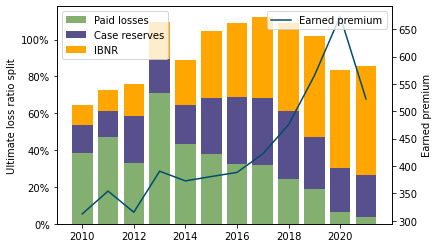

In [182]:
def create_plot(x, y1, y2, y3,y4):

    fig = plt.figure()
    ax1 = fig.gca()
    ax2 = ax1.twinx()


    ax1.bar(x, y1,color='#83af70')
    ax1.bar(x, y2, bottom=y1,color='#58508d')
    ax1.bar(x, y3, bottom=y1+y2,color='#ffa600')
    ax1.set_ylabel("Ultimate loss ratio split")
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    ax1.legend(["Paid losses", "Case reserves", "IBNR"],loc="upper left")

    ax2.plot(x, y4,color='#004c6d')
    ax2.set_ylabel('Earned premium')
    ax2.legend(["Earned premium"], loc="upper right")
    return fig



fig= create_plot(ma_np_booked["Year"] , ma_np_booked["Paid losses"],ma_np_booked["Case reserves"],ma_np_booked["IBNR"], ma_np_booked["Earned premium"])
plt.show()

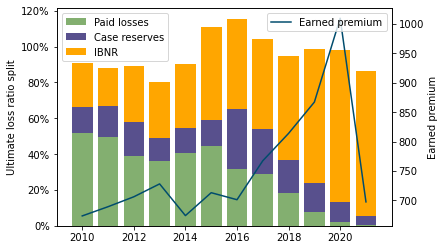

In [183]:
fig2= create_plot(gl_np_booked["Year"] , gl_np_booked["Paid losses"],gl_np_booked["Case reserves"],gl_np_booked["IBNR"], gl_np_booked["Earned premium"])
plt.show()